In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

from sklearn.tree import export_graphviz
from IPython.display import Image  
from pydotplus import graph_from_dot_data

from sklearn.model_selection import cross_val_score

In [3]:
from xgboost import XGBClassifier

In [4]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [5]:
df = pd.read_csv('agaricus-lepiota.csv')

In [6]:
df.columns

Index(['p', 'x', 's', 'n', 't', 'p.1', 'f', 'c', 'n.1', 'k', 'e', 'e.1', 's.1',
       's.2', 'w', 'w.1', 'p.2', 'w.2', 'o', 'p.3', 'k.1', 's.3', 'u'],
      dtype='object')

In [1]:
#df.info()


# Relevant Information:

    This data set includes descriptions of hypothetical samples
    corresponding to 23 species of gilled mushrooms in the Agaricus and
    Lepiota Family (pp. 500-525). 
    
    Each species is identified as
    definitely edible, definitely poisonous, or of unknown edibility and
    not recommended.  This latter class was combined with the poisonous
    one.  
    
    The Guide clearly states that there is no simple rule for
    determining the edibility of a mushroom; no rule like ``leaflets
    three, let it be'' for Poisonous Oak and Ivy.


# Attribute Information: (classes: edible=e, poisonous=p)
     1. cap-shape:                bell=b,conical=c,convex=x,flat=f,
                                  knobbed=k,sunken=s
     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,
                                  pink=p,purple=u,red=e,white=w,yellow=y
     4. bruises?:                 bruises=t,no=f
     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,
                                  musty=m,none=n,pungent=p,spicy=s
     6. gill-attachment:          attached=a,descending=d,free=f,notched=n
     7. gill-spacing:             close=c,crowded=w,distant=d
     8. gill-size:                broad=b,narrow=n
     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g,
                                  green=r,orange=o,pink=p,purple=u,red=e,
                                  white=w,yellow=y
    10. stalk-shape:              enlarging=e,tapering=t
    11. stalk-root:               bulbous=b,club=c,cup=u,equal=e,
                                  rhizomorphs=z,rooted=r,missing=?
    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
    14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    16. veil-type:                partial=p,universal=u
    17. veil-color:               brown=n,orange=o,white=w,yellow=y
    18. ring-number:              none=n,one=o,two=t
    19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l,
                                  none=n,pendant=p,sheathing=s,zone=z
    20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r,
                                  orange=o,purple=u,white=w,yellow=y
    21. population:               abundant=a,clustered=c,numerous=n,
                                  scattered=s,several=v,solitary=y
    22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p,
                                  urban=u,waste=w,woods=d

In [7]:
df.rename(columns = { 'p': 'poisonous', 'x':'cap_shape', 's': 'cap_surface','n':'cap_color',
                     't': 'bruises', 'p.1': 'odor', 'f': 'gill_attachment',
                     'c': 'gill_spacing', 'n.1': 'gill_size', 'k': 'gill_color',
                     'e': 'stalk_shape', 'e.1': 'stalk_root', 's.1': 'stalk_surface_above_ring',
                     's.2': 'stalk_surface_below_ring', 's.2': 'stalk_surface_below_ring',
                     'w': 'stalk_color_above_ring', 'w.1':'stalk_color_below_ring', 'p.2':'veil_type',
                     'w.2': 'veil_color', 'o': 'ring_number', 'p.3': 'ring_type', 'k.1':'spore_print_color',
                     's.3': 'population', 'u': 'habitat'}, inplace = True)

- Assigning binary values to target

In [8]:
#target y 

#1 is poisonous 0 is edible
df['poisonous'] = df['poisonous'].replace(['e', 'p'], [0 , 1])

- Renaming categorical values in each column, for better visibility before one-hot-encoding

In [9]:



#features X
df['cap_shape'] = df['cap_shape'].replace(['b','c','x','f'], ['bell','conical', 'convex', 'flat'])
df['cap_surface'] = df['cap_surface'].replace(['f', 'g', 'y', 's'], ['fibrous', 'grooves', 'scaly','smooth'])
df['cap_color'] = df['cap_color'].replace(['n', 'b', 'c', 'g', 'r', 'p', 'u', 'e', 'w', 'y'], ['brown', 'buff', 'cinnamon','gray', 'green', 'pink', 'purple', 'red', 'white', 'yellow'])
df['bruises'] = df['bruises'].replace(['t', 'f'], ['yes', 'no'])
df['odor'] = df['odor'].replace(['a', 'l', 'c', 'y', 'f', 'm', 'n', 'p', 's'], ['almond', 'anise', 'creosote', 'fishy', 'foul', 'musty', 'none', 'pungent', 'spicy'])
df['gill_attachment'] = df['gill_attachment'].replace(['a', 'd', 'f', 'n'], ['attached', 'descending', 'free', 'notched'])
df['gill_spacing'] = df['gill_spacing'].replace([ 'c', 'w', 'd'], ['close', 'crowded', 'distant'])
df['gill_size'] = df['gill_size'].replace([ 'b', 'n'], ['broad', 'narrow'])
df['gill_color'] = df['gill_color'].replace([ 'k', 'n', 'b', 'h', 'g', 'r', 'o', 'p', 'u', 'e', 'w', 'y'], ['black', 'brown', 'buff', 'chocolate', 'gray', 'green', 'orange', 'pink', 'purple', 'red', 'white', 'yellow'])
df['stalk_shape'] = df['stalk_shape'].replace([ 'e', 't'], ['enlarging', 'tapering'])
df['stalk_root'] = df['stalk_root'].replace(['b', 'c', 'u', 'e', 'z', 'r', '?'], ['bulbous', 'club', 'cup', 'equal', 'rhizomorphs', 'rooted', 'missing'])
df['stalk_surface_above_ring'] = df['stalk_surface_above_ring'].replace([ 'f', 'y', 'k', 's'], ['fibrous', 'scaly', 'silky', 'smooth'])
df['stalk_surface_below_ring'] = df['stalk_surface_below_ring'].replace([ 'f', 'y', 'k', 's'], ['fibrous', 'scaly', 'silky', 'smooth'])
df['stalk_color_above_ring'] = df['stalk_color_above_ring'].replace([ 'n', 'b', 'c', 'g', 'o', 'p', 'e', 'w', 'y'], ['brown', 'buff', 'cinnamon', 'gray', 'orange', 'pink', 'red', 'white', 'yellow'])
df['stalk_color_below_ring'] = df['stalk_color_below_ring'].replace([ 'n', 'b', 'c', 'g', 'o', 'p', 'e', 'w', 'y'], ['brown', 'buff', 'cinnamon', 'gray', 'orange', 'pink', 'red', 'white', 'yellow'])
df['veil_type'] = df['veil_type'].replace([ 'p', 'u'], ['partial', 'universal'])
df['veil_color'] = df['veil_color'].replace([ 'n', 'o', 'w', 'y'], ['brown', 'orange', 'white', 'yellow'])
df['ring_number'] = df['ring_number'].replace([ 'n', 'o', 't'], ['none', 'one', 'two'])
df['ring_type'] = df['ring_type'].replace([ 'c', 'e', 'f', 'l', 'n', 'p', 's', 'z'], ['cobwebby', 'evanescent', 'flaring', 'large', 'none', 'pendant', 'sheathing', 'zone'])
df['spore_print_color'] = df['spore_print_color'].replace([ 'k', 'n', 'b', 'h', 'r', 'o', 'u', 'w', 'y'], ['black', 'brown', 'buff', 'chocolate', 'green', 'orange', 'purple', 'white', 'yellow'])
df['population'] = df['population'].replace(['a', 'c', 'n', 's', 'v', 'y'], ['abundant', 'clustered', 'numerous', 'scattered', 'several', 'solitary'])
df['habitat'] = df['habitat'].replace(['g', 'l', 'm', 'p', 'u', 'w', 'd'], ['grasses', 'leaves', 'meadows', 'paths', 'urban', 'waste', 'woods'])


In [175]:
corr_check = pd.get_dummies(df)

In [204]:
corr_check.corr()

,p_e,p_p,x_b,x_c,x_f,x_k,x_s,x_x,s_f,s_g,s_s,s_y,n_b,n_c,n_e,n_g,n_n,n_p,n_r,n_u,n_w,n_y,t_f,t_t,p.1_a,p.1_c,p.1_f,p.1_l,p.1_m,p.1_n,p.1_p,p.1_s,p.1_y,f_a,f_f,c_c,c_w,n.1_b,n.1_n,k_b,k_e,k_g,k_h,k_k,k_n,k_o,k_p,k_r,k_u,k_w,k_y,e_e,e_t,e.1_?,e.1_b,e.1_c,e.1_e,e.1_r,s.1_f,s.1_k,s.1_s,s.1_y,s.2_f,s.2_k,s.2_s,s.2_y,w_b,w_c,w_e,w_g,w_n,w_o,w_p,w_w,w_y,w.1_b,w.1_c,w.1_e,w.1_g,w.1_n,w.1_o,w.1_p,w.1_w,w.1_y,p.2_p,w.2_n,w.2_o,w.2_w,w.2_y,o_n,o_o,o_t,p.3_e,p.3_f,p.3_l,p.3_n,p.3_p,k.1_b,k.1_h,k.1_k,k.1_n,k.1_o,k.1_r,k.1_u,k.1_w,k.1_y,s.3_a,s.3_c,s.3_n,s.3_s,s.3_v,s.3_y,u_d,u_g,u_l,u_m,u_p,u_u,u_w
p_e,1.000000,-1.000000,0.182548,-0.023012,-0.018629,-0.163620,0.060660,0.027031,0.195352,-0.023012,-0.095285,-0.088791,-0.067567,0.030903,-0.097181,0.046391,0.044574,-0.034722,0.042851,0.042851,0.133644,-0.113072,-0.501758,0.501758,0.219515,-0.161309,-0.623974,0.219515,-0.069172,0.785534,-0.186642,-0.286415,-0.286415,0.129188,-0.129188,-0.348358,0.348358,0.539944,-0.539944,-0.538919,0.105484,-0.120334,-0.150745,0.150381,0.288916,0.085956,0.050323,-0.056437,0.195340,0.231281,0.046818,-0.101888,0.101888,-0.302114,-0.017833,0.218528,0.203250,0.150077,0.119477,-0.587794,0.491460,0.016192,0.136756,-0.573656,0.425592,0.081655,-0.245710,-0.069172,0.105484,0.266472,-0.233211,0.150077,-0.230366,0.217881,-0.032552,-0.245710,-0.069172,0.105484,0.266472,-0.204013,0.150077,-0.230366,0.214255,-0.056437,NaN,0.105484,0.105484,-0.140530,-0.032552,-0.069172,-0.182077,0.204578,-0.223400,0.074367,-0.451710,-0.069172,0.540670,0.074367,-0.490333,0.397173,0.416609,0.074367,-0.098042,0.074367,-0.357499,0.074367,0.214858,0.137628,0.219515,0.159936,-0.443906,0.106998,0.126035,0.164942,-0.155204,0.138611,-0.323422,-0.111645,0.150077
p_p,-1.000000,1.000000,-0.182548,0.023012,0.018629,0.163620,-0.060660,-0.027031,-0.195352,0.023012,0.095285,0.088791,0.067567,-0.030903,0.097181,-0.046391,-0.044574,0.034722,-0.042851,-0.042851,-0.133644,0.113072,0.501758,-0.501758,-0.219515,0.161309,0.623974,-0.219515,0.069172,-0.785534,0.186642,0.286415,0.286415,-0.129188,0.129188,0.348358,-0.348358,-0.539944,0.539944,0.538919,-0.105484,0.120334,0.150745,-0.150381,-0.288916,-0.085956,-0.050323,0.056437,-0.195340,-0.231281,-0.046818,0.101888,-0.101888,0.302114,0.017833,-0.218528,-0.203250,-0.150077,-0.119477,0.587794,-0.491460,-0.016192,-0.136756,0.573656,-0.425592,-0.081655,0.245710,0.069172,-0.105484,-0.266472,0.233211,-0.150077,0.230366,-0.217881,0.032552,0.245710,0.069172,-0.105484,-0.266472,0.204013,-0.150077,0.230366,-0.214255,0.056437,NaN,-0.105484,-0.105484,0.140530,0.032552,0.069172,0.182077,-0.204578,0.223400,-0.074367,0.451710,0.069172,-0.540670,-0.074367,0.490333,-0.397173,-0.416609,-0.074367,0.098042,-0.074367,0.357499,-0.074367,-0.214858,-0.137628,-0.219515,-0.159936,0.443906,-0.106998,-0.126035,-0.164942,0.155204,-0.138611,0.323422,0.111645,-0.150077
x_b,0.182548,-0.182548,1.000000,-0.005388,-0.193292,-0.081780,-0.015266,-0.219548,-0.091660,0.018819,0.117773,-0.027973,0.010006,-0.017914,-0.115521,-0.069777,-0.084868,0.016227,-0.010784,-0.010784,0.212372,0.117971,-0.115732,0.115732,0.262450,-0.037769,-0.146096,0.262450,-0.016196,-0.000340,-0.043700,-0.067061,-0.067061,0.122892,-0.122892,-0.039393,0.039393,0.148426,-0.148426,-0.126181,-0.026546,0.122578,-0.076392,0.101796,0.034740,0.075556,-0.070762,0.105522,-0.061636,0.084872,0.064092,0.277931,-0.277931,0.016328,-0.181014,0.482910,-0.097025,-0.037769,-0.065544,-0.089751,0.113965,0.046154,-0.068553,-0.095556,0.126912,-0.005272,-0.057530,-0.016196,-0.026546,-0.067061,-0.049236,0.131918,-0.132838,0.161536,0.026621,-0.057530,-0.016196,-0.026546,-0.067061,-0.045280,0.131918,-0.132838,0.157427,0.046154,NaN,0.092721,0.092721,-0.134706,0.026621,-0.016196,-0.201132,0.210695,-0.163580,-0.018715,-0.105762,-0.016196,0.237713,0.065368,-0.121716,0.030470,0.038219,0.065368,0.183313,-0.018715,-0.024612,0.065368,-0.054071,0.024352,0.381585,0.158827,-0.168421,-0.120172,-0.182069,0.149137,0.010103,0.374313,-0.095191,-0.052803,-0.037769
x_c,-0.0230

In [15]:
y = df['poisonous']

In [16]:
y.head(15)

0     0
1     0
2     1
3     0
4     0
5     0
6     0
7     1
8     0
9     0
10    0
11    0
12    1
13    0
14    0
Name: poisonous, dtype: int64

# Prelim EDA


In [24]:
sns.set_style('whitegrid')
sns.set_palette(palette = 'muted', n_colors = 2, desat = None)

- Checking distributions for class imbalance.

- Classes are quite evenly distributed

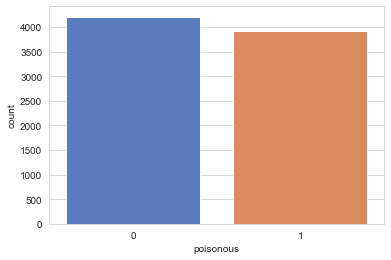

In [25]:
sns.countplot(y)
plt.show()

 - Columns to drop: 
 
     - veil_type : only contains 1 value, 'partial'
     - stalk_root: contains 2480 missing values
     - poisonous (target)
     

In [67]:
df['veil_type'].unique()

array(['partial'], dtype=object)

In [34]:
df['stalk_root'].value_counts()

bulbous    3776
missing    2480
equal      1119
club        556
rooted      192
Name: stalk_root, dtype: int64

In [35]:
df['stalk_root'] = df[df['stalk_root'] != 'missing']

In [36]:
df['stalk_root'].value_counts()

0.0    3488
1.0    2155
Name: stalk_root, dtype: int64

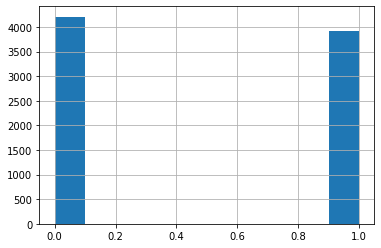

In [39]:
df['poisonous'].hist()

In [40]:
df.shape

(8123, 23)

In [30]:
y = df['poisonous']

In [133]:
y

0       0
1       0
2       1
3       0
4       0
       ..
8118    0
8119    0
8120    0
8121    1
8122    0
Name: poisonous, Length: 8123, dtype: int64

In [59]:
X = df.drop(columns = 'poisonous', inplace = True)

In [60]:
X = df.drop(columns = 'stalk_root', inplace = True)

In [61]:
X.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [58]:
X.head()

,poisonous,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,0,convex,smooth,yellow,yes,almond,free,close,broad,black,enlarging,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
1,0,bell,smooth,white,yes,anise,free,close,broad,brown,enlarging,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
2,1,convex,scaly,white,yes,pungent,free,close,narrow,brown,enlarging,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban
3,0,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,smooth,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
4,0,convex,scaly,yellow,yes,almond,free,close,broad,brown,enlarging,smooth,smooth,white,white,partial,white,one,pendant,black,numerous,grasses


In [49]:
X = pd.get_dummies(X)

In [50]:
X.shape

(8123, 113)

In [21]:
X2 = pd.get_dummies(df)

In [181]:
X2 = X2.drop(columns = 'odor_none')

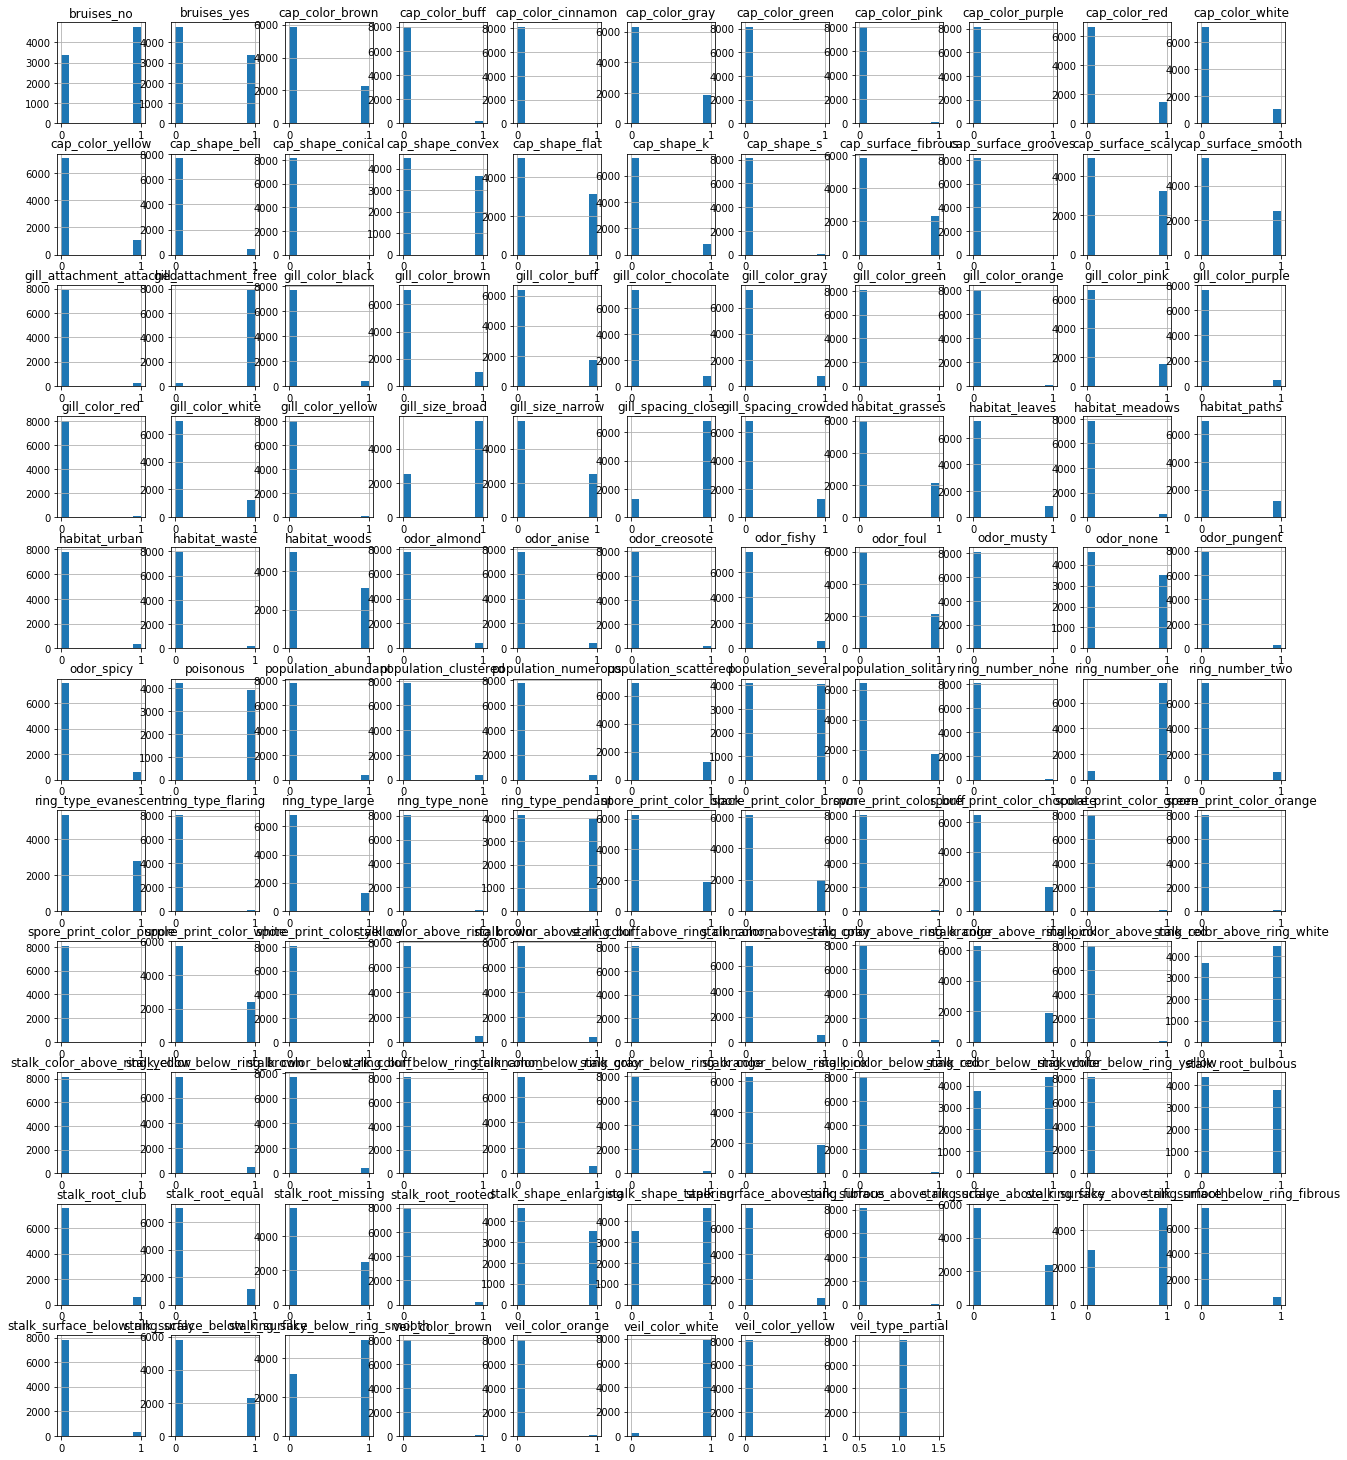

In [27]:
X2.hist(figsize = (22, 26))
plt.show()

In [166]:
def plotdata(hue, data):
    for i, col in enumerate(data.columns):
        plt.figure(i)
        sns.set(rc = {'figure.figsize': (8, 6)})
        x = sns.countplot(x= data[col], hue = hue, data = data)

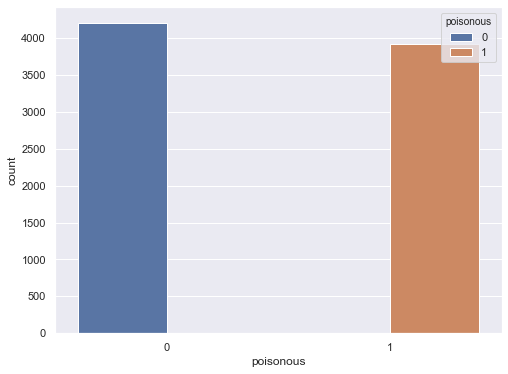

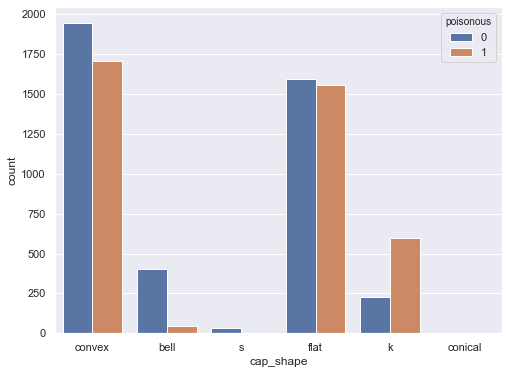

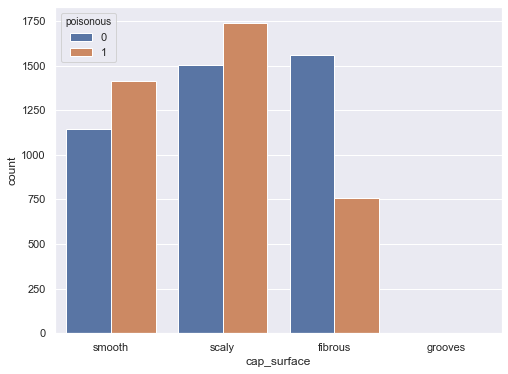

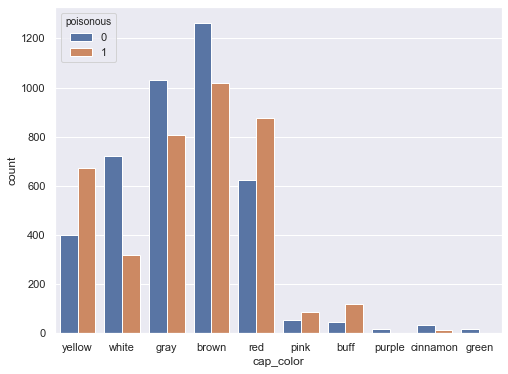

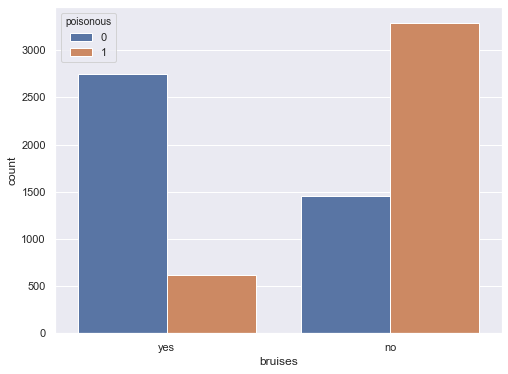

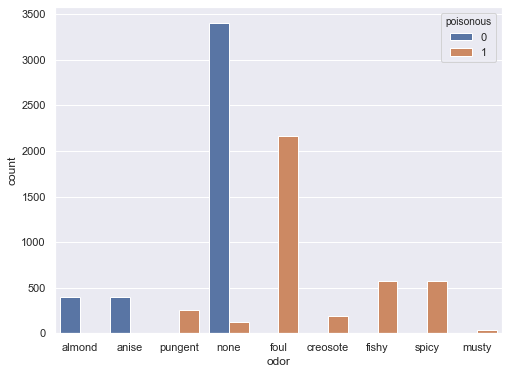

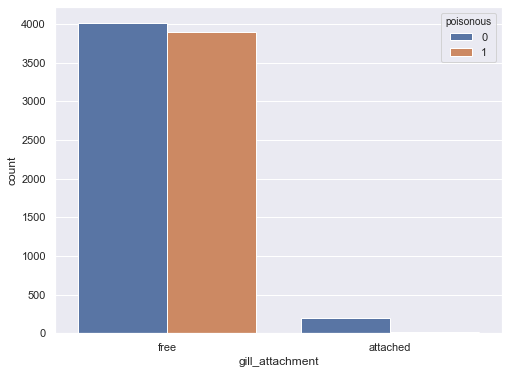

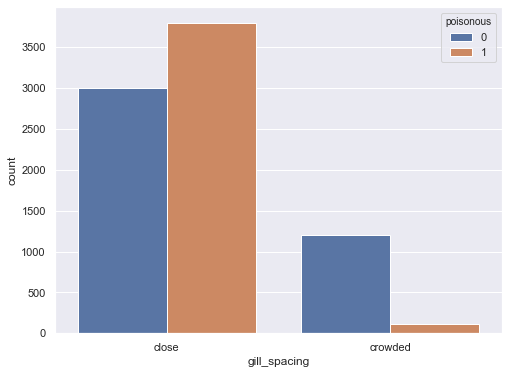

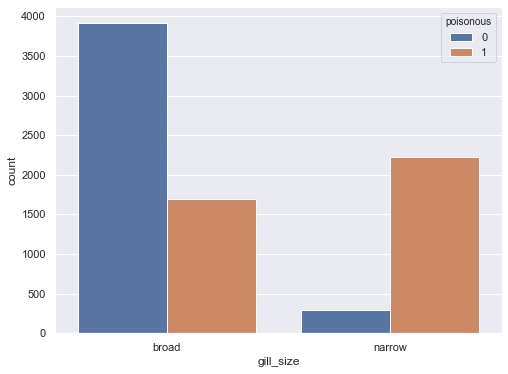

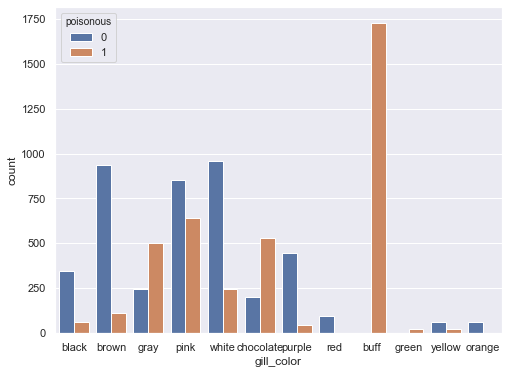

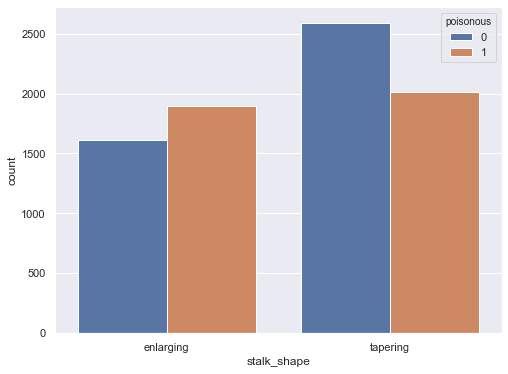

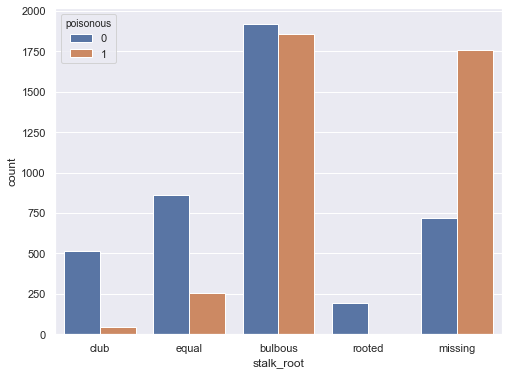

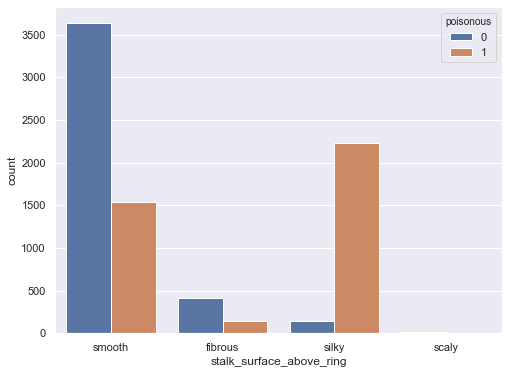

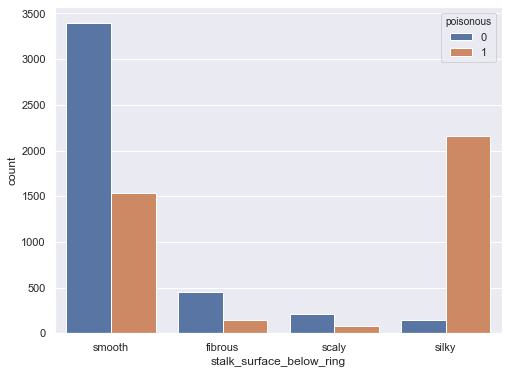

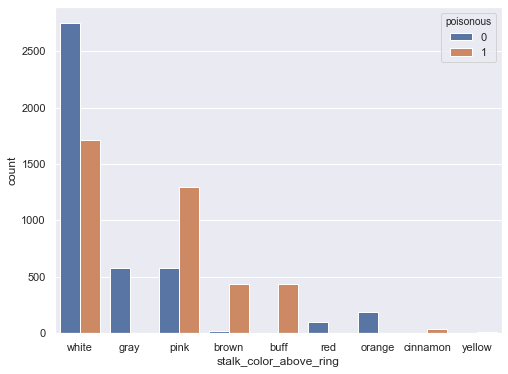

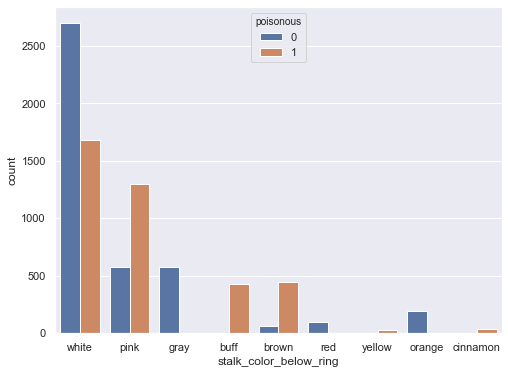

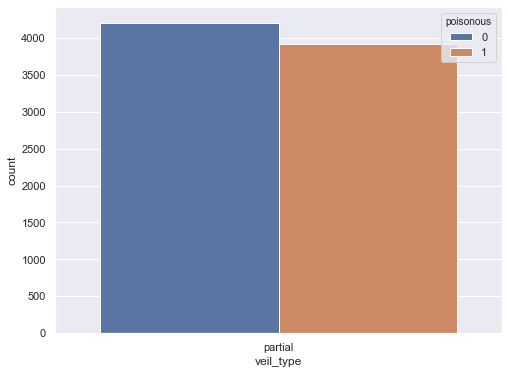

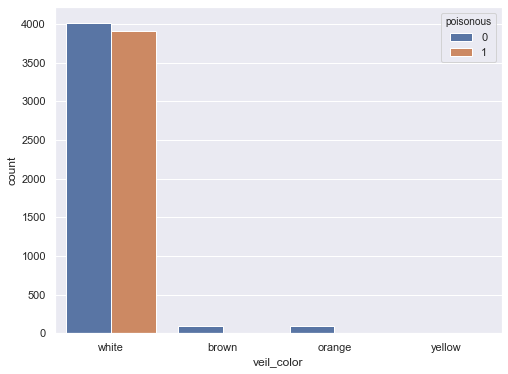

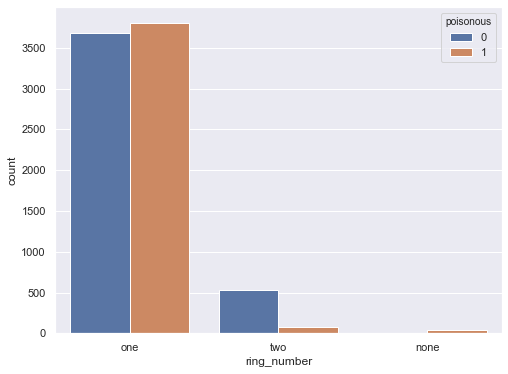

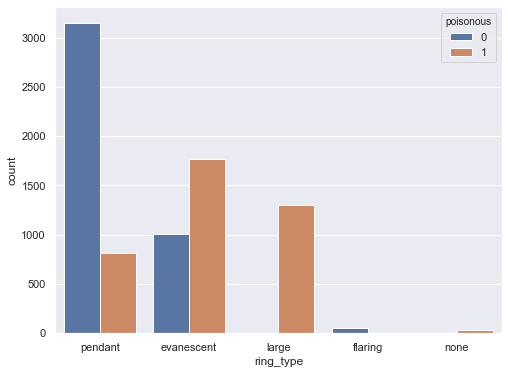

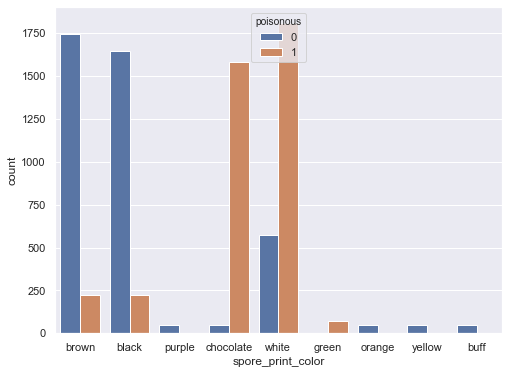

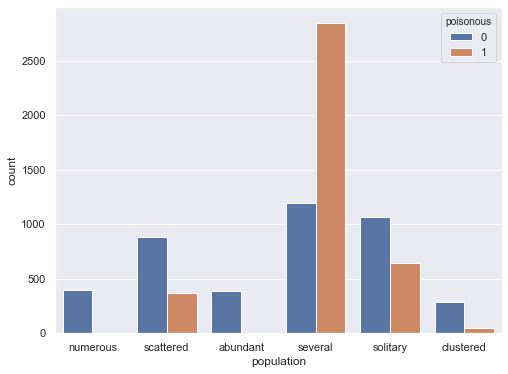

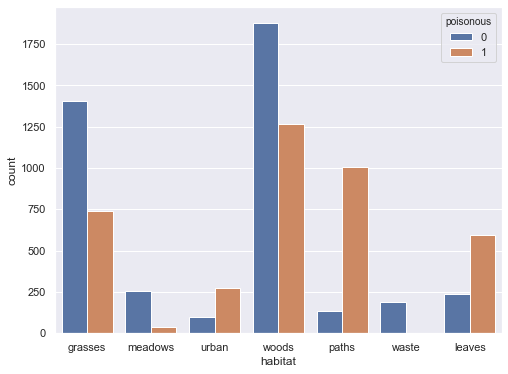

In [167]:
plotdata(y, df)

Observations


- odor_none has the greatest feature importance

- Why is gill_color "buff" not included as an important feature when all of the mushrooms containing this are of the poisonous variety?

- Spore print color "green" does not to appear to have any significance however it is classified as an important feature per initial models. While colors "chocolate" and "white" seem to have more of an effect.

- Stalk surface below ring does not visually appear to have any significant impact, however is classified as an important feature per first decision tree model. 



# XG Boost Initial Model


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42)

In [51]:
# Instantiate XGBClassifier
clf = XGBClassifier()

# Fit XGBClassifier
clf.fit(X_train, y_train)

# Predict on training and test sets
training_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 100.0%
Validation accuracy: 100.0%


In [ ]:
# CV = GridSearchCV(clf, param_grid, scoring= 'accuracy', cv = None, n_jobs =1)

In [ ]:
# CV.fit(X_train, y_train)

# Decision Tree

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 42)

In [255]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size = .25, random_state = 42)

In [256]:
# Instantiate and fit a DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 6)
tree_clf.fit(X2_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [257]:
tree_clf.feature_importances_

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

ValueError: shape mismatch: objects cannot be broadcast to a single shape

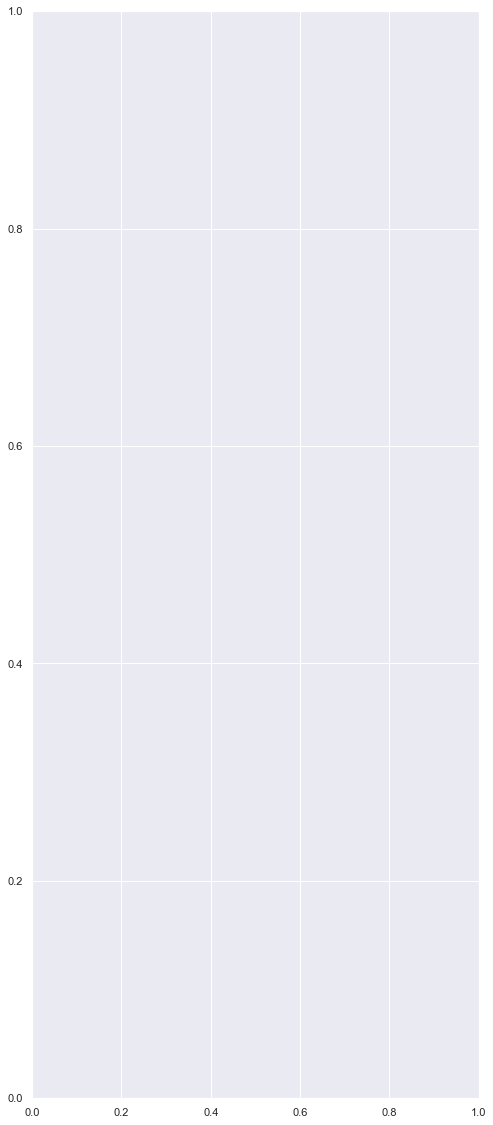

In [258]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,20))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

In [259]:
X2

,poisonous,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_k,cap_shape_s,cap_surface_fibrous,cap_surface_grooves,cap_surface_scaly,cap_surface_smooth,cap_color_brown,cap_color_buff,cap_color_cinnamon,cap_color_gray,cap_color_green,cap_color_pink,cap_color_purple,cap_color_red,cap_color_white,cap_color_yellow,bruises_no,bruises_yes,odor_almond,odor_anise,odor_creosote,odor_fishy,odor_foul,odor_musty,odor_pungent,odor_spicy,gill_attachment_attached,gill_attachment_free,gill_spacing_close,gill_spacing_crowded,gill_size_broad,gill_size_narrow,gill_color_black,gill_color_brown,gill_color_buff,gill_color_chocolate,gill_color_gray,gill_color_green,gill_color_orange,gill_color_pink,gill_color_purple,gill_color_red,gill_color_white,gill_color_yellow,stalk_shape_enlarging,stalk_shape_tapering,stalk_root_bulbous,stalk_root_club,stalk_root_equal,stalk_root_missing,stalk_root_rooted,stalk_surface_above_ring_fibrous,stalk_surface_above_ring_scaly,stalk_surface_above_ring_silky,stalk_surface_above_ring_smooth,stalk_surface_below_ring_fibrous,stalk_surface_below_ring_scaly,stalk_surface_below_ring_silky,stalk_surface_below_ring_smooth,stalk_color_above_ring_brown,stalk_color_above_ring_buff,stalk_color_above_ring_cinnamon,stalk_color_above_ring_gray,stalk_color_above_ring_orange,stalk_color_above_ring_pink,stalk_color_above_ring_red,stalk_color_above_ring_white,stalk_color_above_ring_yellow,stalk_color_below_ring_brown,stalk_color_below_ring_buff,stalk_color_below_ring_cinnamon,stalk_color_below_ring_gray,stalk_color_below_ring_orange,stalk_color_below_ring_pink,stalk_color_below_ring_red,stalk_color_below_ring_white,stalk_color_below_ring_yellow,veil_type_partial,veil_color_brown,veil_color_orange,veil_color_white,veil_color_yellow,ring_number_none,ring_number_one,ring_number_two,ring_type_evanescent,ring_type_flaring,ring_type_large,ring_type_none,ring_type_pendant,spore_print_color_black,spore_print_color_brown,spore_print_color_buff,spore_print_color_chocolate,spore_print_color_green,spore_print_color_orange,spore_print_color_purple,spore_print_color_white,spore_print_color_yellow,population_abundant,population_clustered,population_numerous,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,0,0,0,0,1,0,0,0

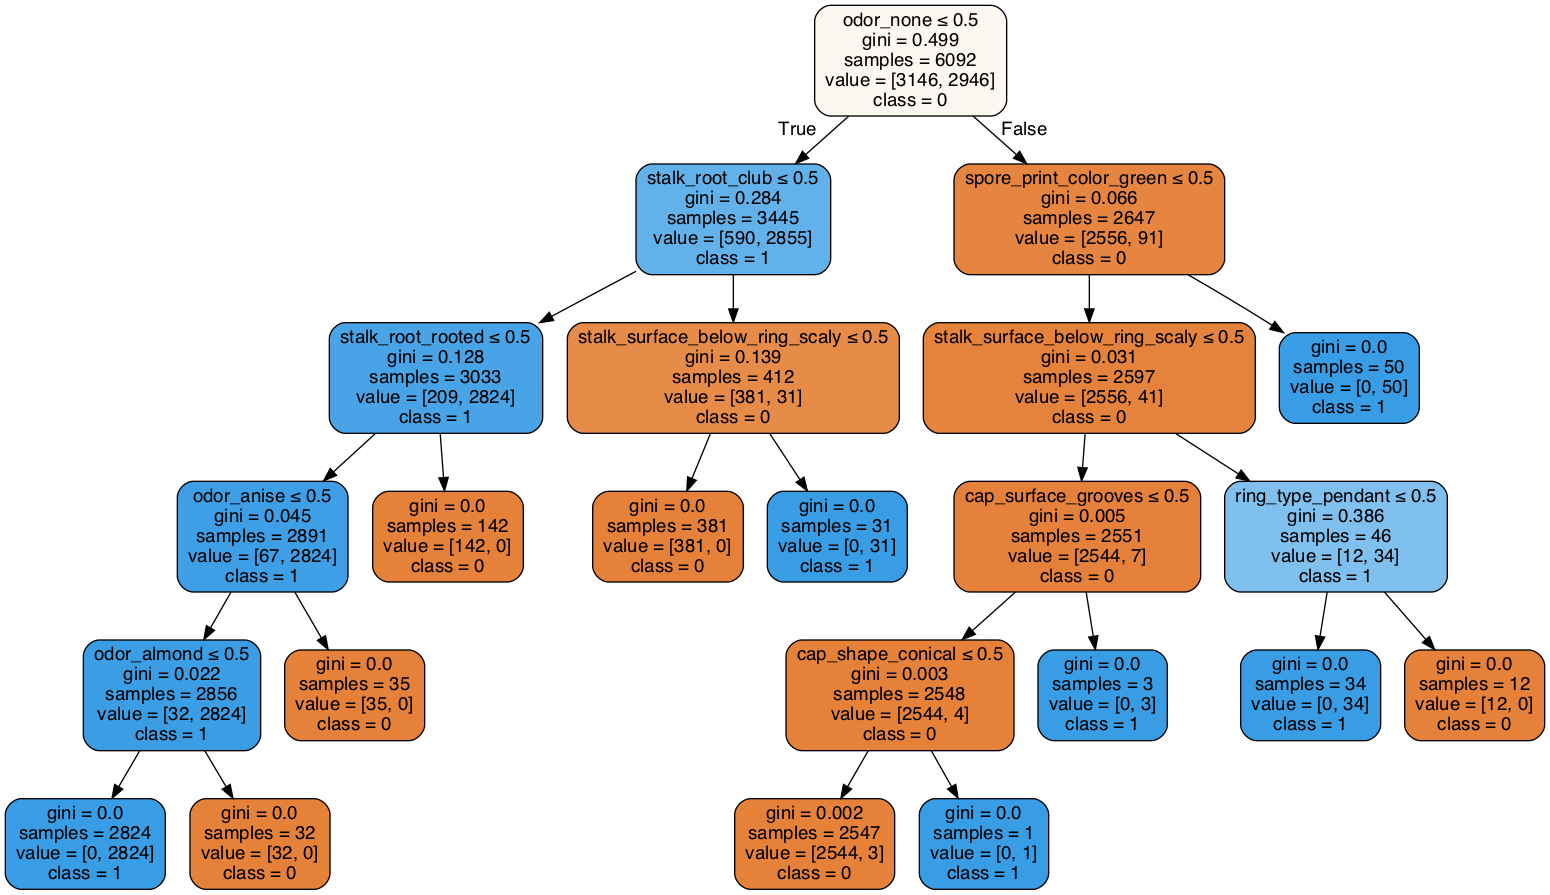

In [195]:
#Create DOT data
dot_data = export_graphviz(tree_clf, out_file=None, 
                           feature_names=X_train.columns,  
                           class_names=np.unique(y).astype('str'), 
                           filled=True, rounded=True, special_characters=True)

# # Draw graph
graph = graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [196]:
pred = tree_clf.predict(X_test)

In [197]:
# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)


AUC is :1.0

Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,1062,0,1062
1,0,969,969
All,1062,969,2031


In [198]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 100.0%


In [199]:
#tree_clf.score(X_test, y_test)
tree_clf.score(X_train, y_train)

0.9995075508864084

# Bagged Tree

In [80]:
tree_to_bag = DecisionTreeClassifier(criterion = 'gini', max_depth = 5)
bagged_tree = BaggingClassifier(n_estimators = 20)

In [81]:
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=20,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [82]:
bagged_pred = bagged_tree.predict(X_test)

In [86]:
#bagged_pred.score(X_train)

# Random Forest

In [205]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100 , max_depth = 5)

In [206]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [208]:
# Train accuracy score
forest.score(X_train, y_train)

0.9913000656598818

In [209]:
# Test accuracy score
forest.score(X_test, y_test)

0.9886755292959133

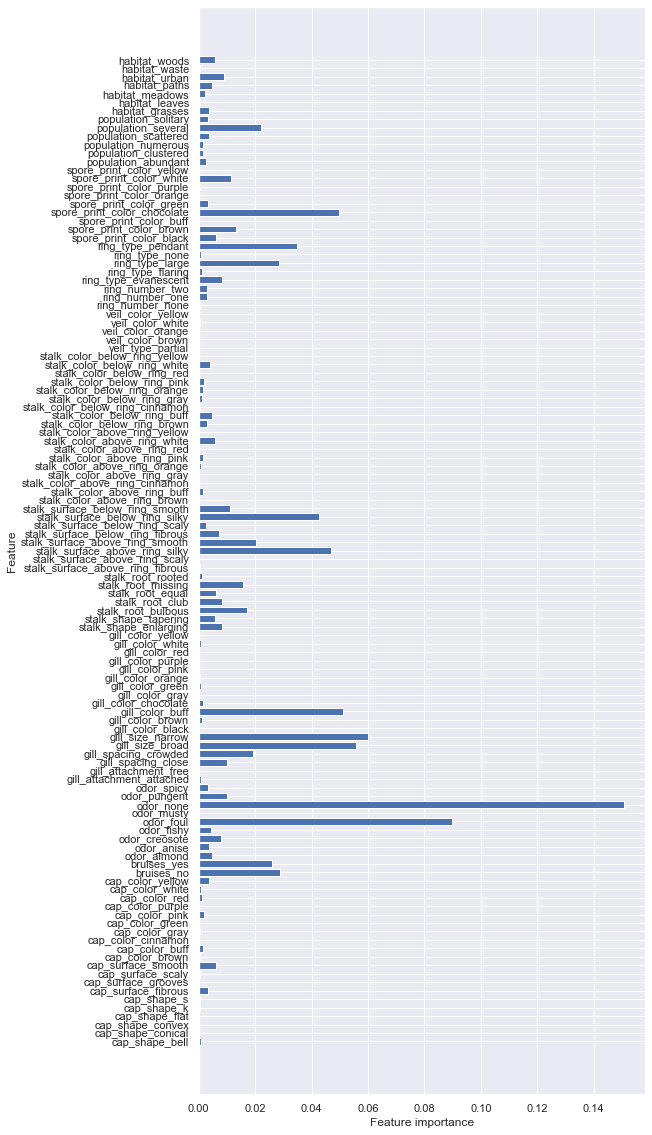

In [210]:
plot_feature_importances(forest)

# Random Forest 2


In [213]:
forest_2 = RandomForestClassifier(n_estimators = 5, max_features = 10 , max_depth = 2)

In [216]:
forest_2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [222]:
rf_tree_1 = forest_2.estimators_[0]
rf_tree_2 = forest_2.estimators_[1]
rf_tree_3 = forest_2.estimators_[2]
rf_tree_4 = forest_2.estimators_[3]
rf_tree_5 = forest_2.estimators_[4]

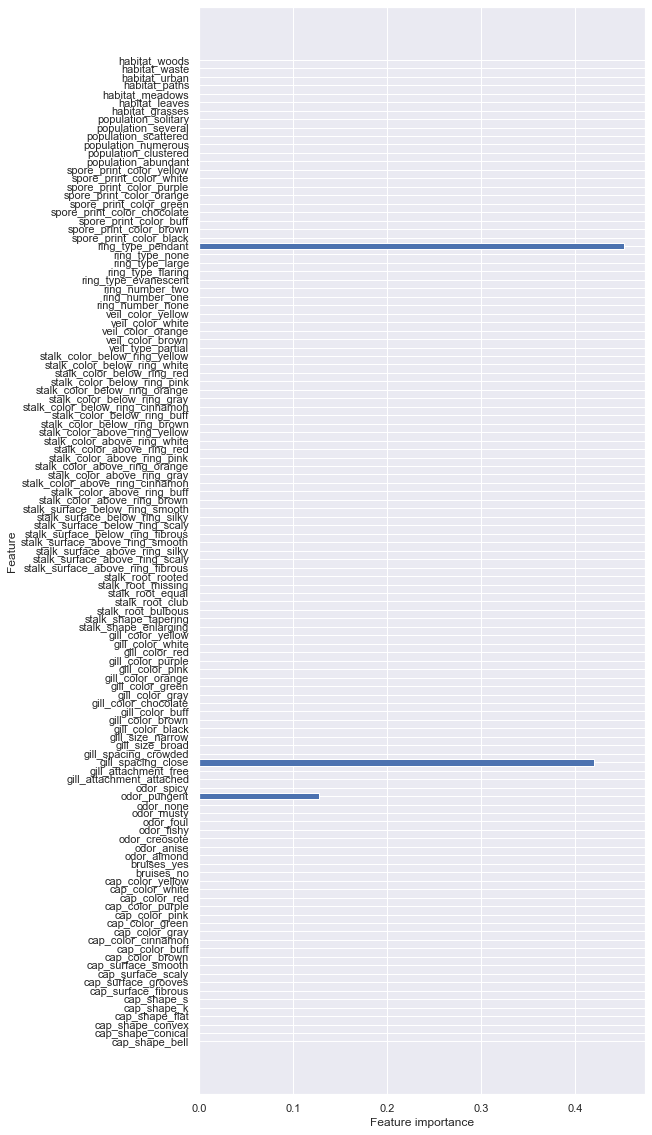

In [224]:
plot_feature_importances(rf_tree_3)

In [228]:
forest2_pred = forest_2.predict(X_test)

In [230]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, forest2_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, forest2_pred, rownames=['True'], colnames=['Predicted'], margins=True)


AUC is :0.93

Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,1024,38,1062
1,104,865,969
All,1128,903,2031


In [232]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(forest2_pred,y_test) * 100))

Testing Accuracy for Decision Tree Classifier: 93.01%


In [68]:
print(classification_report(y_test, forest2_pred))

NameError: name 'y_test' is not defined

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
import itertools
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)